In [36]:
import pandas as pd 
import seaborn as sns
import sort_dataframeby_monthorweek as sd
import matplotlib.pyplot as plt
import pycountry


In [9]:
#import data
df = pd.read_csv('hotel_bookings.csv')

In [10]:
#call out all the column names to check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [11]:
#let's understand the data 
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [12]:
#let's find the unique values in each variables
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [13]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [14]:
df['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [15]:
df['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [16]:
df['distribution_channel'].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [17]:
df['agent'].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: agent, Length: 333, dtype: int64

In [18]:
df['deposit_type'].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [19]:
df['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [20]:
df['total_of_special_requests'].value_counts()

0    70318
1    33226
2    12969
3     2497
4      340
5       40
Name: total_of_special_requests, dtype: int64

<Axes: xlabel='hotel', ylabel='count'>

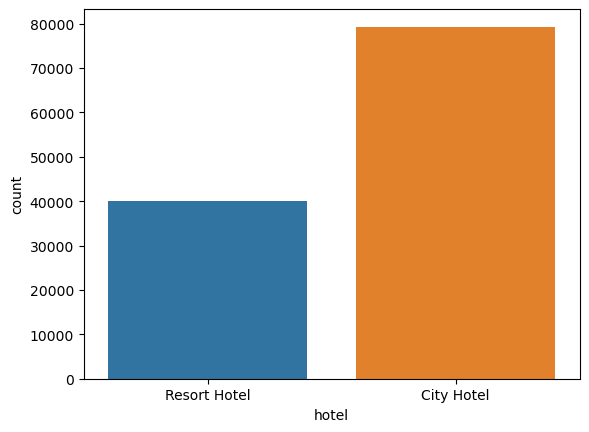

In [21]:
#check if the data is balance 
sns.countplot(data=df, x='hotel')

<Axes: xlabel='hotel', ylabel='count'>

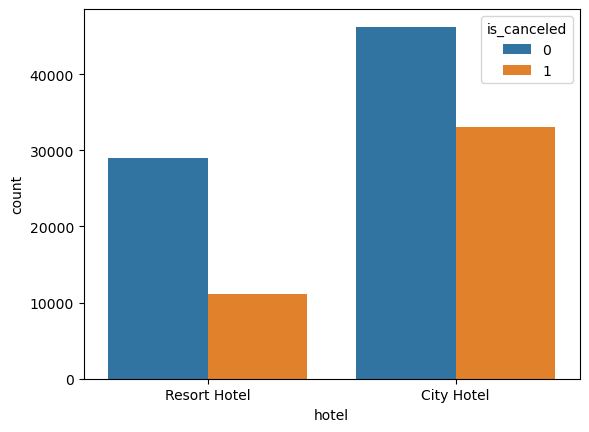

In [22]:
#check the cancelaton within each hotel 
sns.countplot(data=df, x='hotel', hue='is_canceled')

##Data Cleaning

In [23]:
#drop duplicate data
df.drop_duplicates(keep='first', inplace=True)
df.duplicated().sum()


0

In [24]:
#check null values
df.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [25]:
#change null values to either zero or unknown 
df['country']=df['country'].fillna('Unknown')
df['agent']=df['agent'].fillna(0)
df['company']=df['company'].fillna(0)
df['children']=df['children'].fillna(0)
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [26]:
#change the data type
df['children']=df['children'].astype('int64')
df['agent']=df['agent'].astype('int64')
df['company']=df['company'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  int64  
 11  babies                          87396 non-null  int64  
 12  meal                           

In [27]:
# Filter the data where children, adults, and babies are not all 0 
df = df[~((df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0))]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304,0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394,0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9,0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9,0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89,0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [28]:
#check if the data where children, adults, and babiesare equal 0 have been excluded from the dataframe
df[(df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [29]:
#change data type of meal to str before merge the datas  
df['meal']=df['meal'].astype(str)

In [30]:
#merge the undefined data to SC 
df['meal']=df['meal'].replace('Undefined','SC')

In [31]:
#check if the undefined and SC datas have merged 
df['meal'].value_counts()

BB    67907
SC     9883
HB     9080
FB      360
Name: meal, dtype: int64

In [32]:
#show columns full view 
pd.set_option('display.max_columns', None)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394,0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9,0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89,0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [37]:
#add dictionary of map mapping 
country_mapping = {c.alpha_3: c.name for c in pycountry.countries}

In [38]:
#add new coloumn where country name contains more than 3 letters
df['country_name']=df['country'].map(country_mapping)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,country_name
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,Portugal
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,Portugal
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,United Kingdom
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,United Kingdom
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98.00,0,1,Check-Out,2015-07-03,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394,0,0,Transient,96.14,0,0,Check-Out,2017-09-06,Belgium
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9,0,0,Transient,225.43,0,2,Check-Out,2017-09-07,France
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,0,0,Transient,157.71,0,4,Check-Out,2017-09-07,Germany
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89,0,0,Transient,104.40,0,0,Check-Out,2017-09-07,United Kingdom


## What Countries the Guests Are From 

In [144]:
#answering the questions 
#is_canceled has to be zero because we want to pull data where the guests actually show up
country_guests=df[df['is_canceled']==0]['country_name'].value_counts().reset_index()
country_guests.columns=['country_name','no of guests']
country_guests.head(5)

,country_name,no of guests
0,Portugal,17573
1,United Kingdom,8440
2,France,7091
3,Spain,5382
4,Germany,4332


## Resort Hotel Cancellations Throughout the Months in 2015-2017

In [163]:
resort_hotel_cancellation =df[(df['hotel']=='Resort Hotel')&(df['is_canceled']>0)]
month_resort_hotel_cancellation= resort_hotel_cancellation['arrival_date_month'].value_counts().reset_index().rename(columns={'index':'month','arrival_date_month':'no of cancellations'}).sort_values(by='month')
month_resort_hotel_cancellation

,month,no of cancellations
4,April,659
0,August,1513
9,December,398
8,February,439
11,January,274
1,July,1300
2,June,833
7,March,465
3,May,696
10,November,307


In [182]:
#sort month_resort_hotel_cancellation 
def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

#sort the month in month_resort_hotel_cancellation
Sort_Resort_Hotel_Cancellations= sort_month (month_resort_hotel_cancellation, 'month')
Sort_Resort_Hotel_Cancellations

,month,no of cancellations
0,January,274
1,February,439
2,March,465
3,April,659
4,May,696
5,June,833
6,July,1300
7,August,1513
8,September,575
9,October,515


In [180]:
#month with highest reservation for resort hotel 
resort_hotel_reservation=df[(df['hotel']=='Resort Hotel')&(df['is_canceled']==0)]
month_resort_hotel_reservation= resort_hotel_reservation['arrival_date_month'].value_counts().reset_index().rename(columns={'index':'month','arrival_date_month':'no of reservations'})
month_resort_hotel_reservation


,month,no of reservations
0,August,3153
1,July,3013
2,May,2246
3,October,2209
4,March,2191
5,April,2169
6,February,2053
7,June,1926
8,September,1875
9,November,1744


In [181]:
#sort 
def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

sort_resort_hotel_reservation=sort_month (month_resort_hotel_reservation, 'month')
sort_resort_hotel_reservation

,month,no of reservations
0,January,1687
1,February,2053
2,March,2191
3,April,2169
4,May,2246
5,June,1926
6,July,3013
7,August,3153
8,September,1875
9,October,2209


In [183]:
#merge resort hotel reservation + cancellation 
final_resort_hotel=sort_resort_hotel_reservation.merge(Sort_Resort_Hotel_Cancellations, on='month')
final_resort_hotel

,month,no of reservations,no of cancellations
0,January,1687,274
1,February,2053,439
2,March,2191,465
3,April,2169,659
4,May,2246,696
5,June,1926,833
6,July,3013,1300
7,August,3153,1513
8,September,1875,575
9,October,2209,515


## Resort Hotel Reservation and Cancellation Throughout the Year 

In [10]:
#resort hotel reservation throughout the year 
resort_hotel_reservation_year = df[(df['is_canceled']==0)&(df['hotel']=='Resort Hotel')].groupby('arrival_date_year')['hotel'].count().reset_index().rename(columns={'arrival_date_year':'year','hotel':'no of reservation'})
resort_hotel_reservation_year

,year,no of reservation
0,2015,6176
1,2016,13637
2,2017,9125


In [11]:
#resort hotel cancellation throughout the year 
resort_hotel_cancellation_year =df[(df['is_canceled']>0)&(df['hotel']=='Resort Hotel')].groupby('arrival_date_year')['hotel'].count().reset_index().rename(columns={'arrival_date_year':'year','hotel':'no of cancellations'})
resort_hotel_cancellation_year

,year,no of cancellations
0,2015,2138
1,2016,4930
2,2017,4054


In [12]:
final_resort_hotel_year=resort_hotel_cancellation_year.merge(resort_hotel_reservation_year, on='year')
final_resort_hotel_year

,year,no of cancellations,no of reservation
0,2015,2138,6176
1,2016,4930,13637
2,2017,4054,9125


In [40]:
df.to_csv('modified_dataframe.csv', index=False)